In [146]:
#Impor Library yang dibutuhkan
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
import numpy

In [147]:
#buat fungsi dan prosedur untuk pengambilan,pengolahan dan pemisahan data
def get_data():
    #get train data
    train_data_path ='el4233-2018-2019-02-ann-regresi-training.csv'
    train = pd.read_csv(train_data_path,header=None)
    
    #get test data
    test_data_path ='el4233-2018-2019-02-ann-regresi-test.csv'
    test = pd.read_csv(test_data_path,header=None)
    
    return train , test

def get_combined_data():
    #reading train data
    train , test = get_data()
    
    test[0] = test[1]
    test.drop([1],axis = 1 , inplace = True)
    
    target = train[1]
    train.drop([1],axis = 1 , inplace = True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    
    return combined, target

def split_combined():
    global combined
    train = combined[:1000]
    test = combined[1000:]

    return train , test 

In [148]:
#Jalankan Fungsi dan prosedur
train_data, test_data = get_data()

combined, target = get_combined_data()

train, test = split_combined()

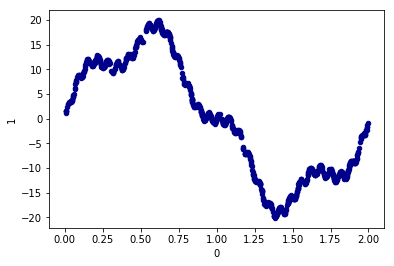

In [149]:
#untuk mendapatkan insight lebih lanjut mengenai data training, visualisasikan datanya
ax1 = train_data.plot.scatter(x=0,
                      y=1,
                      c='DarkBlue')
ax1

In [158]:
#Buat model neural network
NN_model = Sequential()

    # The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

    # The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

    # The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_192 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_193 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_194 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 33        
Total params: 2,737
Trainable params: 2,737
Non-trainable params: 0
_________________________________________________________________


In [159]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [160]:
#Lakukan pelatihan pada model yang sudah dibuat
NN_model.fit(train, target, epochs=1000, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 10.3927 - mean_absolute_error: 10.3927 - val_loss: 10.2836 - val_mean_absolute_error: 10.2836

Epoch 00001: val_loss improved from inf to 10.28356, saving model to Weights-001--10.28356.hdf5
Epoch 2/1000
800/800 [==============================] - 0s 56us/step - loss: 10.3900 - mean_absolute_error: 10.3900 - val_loss: 10.2822 - val_mean_absolute_error: 10.2822

Epoch 00002: val_loss improved from 10.28356 to 10.28223, saving model to Weights-002--10.28223.hdf5
Epoch 3/1000
800/800 [==============================] - 0s 54us/step - loss: 10.3901 - mean_absolute_error: 10.3901 - val_loss: 10.2844 - val_mean_absolute_error: 10.2844

Epoch 00003: val_loss did not improve from 10.28223
Epoch 4/1000
800/800 [==============================] - 0s 70us/step - loss: 10.3895 - mean_absolute_error: 10.3895 - val_loss: 10.2853 - val_mean_absolute_error: 10.2853

Epoch 00004: val_l

In [161]:
# Unggah file dengan val_loss terendah (karena val_loss rendah menunjukan model terbaik) :
wights_file = 'Weights-935--0.88597.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [163]:
#definisikan prosedur untuk memprediksi file test dan memvisualisasikan outputnya
def make_submission(prediction, sub_name):
    df = pd.read_csv('el4233-2018-2019-02-ann-regresi-test.csv',header=None)
    my_submission = pd.DataFrame({'0':df[0],
                                  '1':df[1],
                                  '2':prediction})
    axl = my_submission.plot.scatter(x=1,
                      y=2,
                      c='DarkBlue')
    my_submission.to_csv('{}'.format(sub_name),index=False)
    print('A submission file has been made')

A submission file has been made


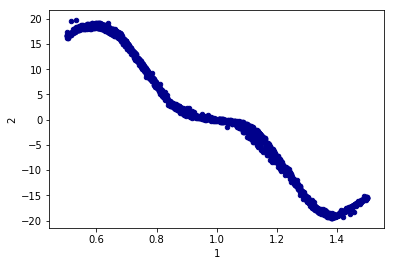

In [164]:
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'el4233-2018-2019-02-ann-regresi-solution.csv')